In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv("titanic.csv")

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  WikiId       1304 non-null   float64
 13  Name_wiki    1304 non-null   object 
 14  Age_wiki     1302 non-null   float64
 15  Hometown     1304 non-null   object 
 16  Boarded      1304 non-null   object 
 17  Destination  1304 non-null   object 
 18  Lifeboat     502 non-null    object 
 19  Body  

In [6]:
100*data.isnull().sum()/len(data)
# missing Data in percent

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
WikiId          0.381971
Name_wiki       0.381971
Age_wiki        0.534759
Hometown        0.381971
Boarded         0.381971
Destination     0.381971
Lifeboat       61.650115
Body           90.068755
Class           0.381971
dtype: float64

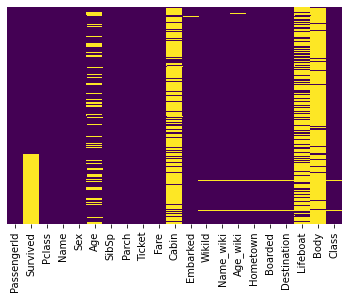

In [7]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
# how we could see, we have columns with missing data ore the column with the same informations
# lets start with Data Cleaning

In [9]:
data.drop(["WikiId", "Age_wiki", "Body", "Lifeboat", "Ticket"], axis=1, inplace=True)

In [10]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Name_wiki,Hometown,Boarded,Destination,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,"Braund, Mr. Owen Harris","Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,"Cumings, Mrs. Florence Briggs (née Thayer)","New York, New York, US",Cherbourg,"New York, New York, US",1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,"Heikkinen, Miss Laina","Jyväskylä, Finland",Southampton,New York City,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,"Futrelle, Mrs. Lily May (née Peel)","Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,"Allen, Mr. William Henry","Birmingham, West Midlands, England",Southampton,New York City,3.0


In [11]:
data["Class"].unique()

array([ 3.,  1.,  2., nan])

In [12]:
data["Class"].value_counts()

3.0    706
1.0    326
2.0    272
Name: Class, dtype: int64

In [13]:
data["Class"] = data["Class"].replace(np.nan, 3.0)

In [14]:
data["Class"] = data["Class"].astype(int)

In [15]:
data.groupby("Class").count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Name_wiki,Hometown,Boarded,Destination
Class,,,,,,,,,,,,,,,
1,326,217,326,326,326,287,326,326,326,258,324,326,326,326,326
2,272,182,272,272,272,257,272,272,272,20,272,272,272,272,272
3,711,492,711,711,711,502,711,711,710,17,711,706,706,706,706


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Name_wiki    1304 non-null   object 
 12  Hometown     1304 non-null   object 
 13  Boarded      1304 non-null   object 
 14  Destination  1304 non-null   object 
 15  Class        1309 non-null   int32  
dtypes: float64(3), int32(1), int64(4), object(8)
memory usage: 158.6+ KB


In [17]:
100*data.isnull().sum()/len(data)

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
Name_wiki       0.381971
Hometown        0.381971
Boarded         0.381971
Destination     0.381971
Class           0.000000
dtype: float64

In [18]:
data["Survived"].unique()

array([ 0.,  1., nan])

In [19]:
data["Survived"].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [20]:
data["Survived"]=data["Survived"].replace(np.nan, 0.0)

In [21]:
data["Survived"] = data["Survived"].astype(int)

In [22]:
data.groupby("Survived").count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Name_wiki,Hometown,Boarded,Destination,Class
Survived,,,,,,,,,,,,,,,
0,967,967,967,967,756,967,967,966,159,967,963,963,963,963,967
1,342,342,342,342,290,342,342,342,136,340,341,341,341,341,342


In [23]:
data["Age"].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  , 22.5 ,
       18.5 , 67.  , 76.  , 26.5 , 60.5 , 11.5 ,  0.33,  0.17, 38.5 ])

In [24]:
data["Age"].median()

28.0

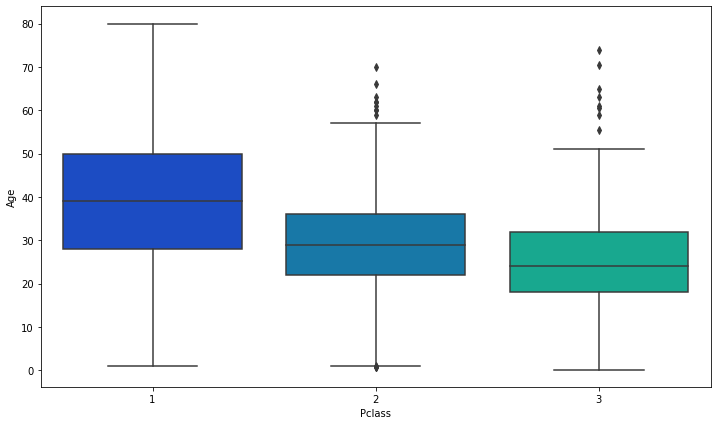

In [25]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=data,palette='winter')

In [26]:
# We see that the wealthier passengers in the higher classes tend to be older. 
# This makes perfect sense. We now use these averages to insert the age using the Pclass.

In [27]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 28

        else:
            return 24

    else:
        return Age

In [28]:
data['Age'] = data[['Age','Pclass']].apply(impute_age,axis=1)

In [29]:
100*data.isnull().sum()/len(data)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
Name_wiki       0.381971
Hometown        0.381971
Boarded         0.381971
Destination     0.381971
Class           0.000000
dtype: float64

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int32  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Name_wiki    1304 non-null   object 
 12  Hometown     1304 non-null   object 
 13  Boarded      1304 non-null   object 
 14  Destination  1304 non-null   object 
 15  Class        1309 non-null   int32  
dtypes: float64(2), int32(2), int64(4), object(8)
memory usage: 153.5+ KB


In [31]:
data["Age"] = data["Age"].astype(int)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int32  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   int32  
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Name_wiki    1304 non-null   object 
 12  Hometown     1304 non-null   object 
 13  Boarded      1304 non-null   object 
 14  Destination  1304 non-null   object 
 15  Class        1309 non-null   int32  
dtypes: float64(1), int32(3), int64(4), object(8)
memory usage: 148.4+ KB


In [33]:
data["Fare"].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [34]:
data["Fare"].value_counts()

8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
33.5000     1
7.8000      1
26.3875     1
15.5792     1
7.1417      1
Name: Fare, Length: 281, dtype: int64

In [35]:
data["Fare"]=data["Fare"].replace(np.nan, 8.0500)

In [36]:
data["Fare"]=round(data["Fare"])

In [37]:
data["Fare"].value_counts()

8.0     309
7.0      94
26.0     67
13.0     66
10.0     58
       ... 
4.0       1
5.0       1
3.0       1
38.0      1
46.0      1
Name: Fare, Length: 94, dtype: int64

In [38]:
data.groupby("Fare").count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Cabin,Embarked,Name_wiki,Hometown,Boarded,Destination,Class
Fare,,,,,,,,,,,,,,,
0.0,17,17,17,17,17,17,17,17,4,17,17,17,17,17,17
3.0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1
4.0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1
5.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6.0,8,8,8,8,8,8,8,8,0,8,8,8,8,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228.0,5,5,5,5,5,5,5,5,3,5,4,4,4,4,5
248.0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
262.0,7,7,7,7,7,7,7,7,6,7,7,7,7,7,7


In [39]:
100*data.isnull().sum()/len(data)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Fare            0.000000
Cabin          77.463713
Embarked        0.152788
Name_wiki       0.381971
Hometown        0.381971
Boarded         0.381971
Destination     0.381971
Class           0.000000
dtype: float64

In [40]:
# We now have to convert categorical content with pandas into dummy variables. 
# Otherwise our machine learning algorithm could not work with them

In [41]:
data.drop(["Boarded", "Destination", "Hometown", "Name", "Name_wiki"], axis=1, inplace=True)

In [42]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Class
0,1,0,3,male,22,1,0,7.0,NaN,S,3
1,2,1,1,female,38,1,0,71.0,C85,C,1
2,3,1,3,female,26,0,0,8.0,NaN,S,3
3,4,1,1,female,35,1,0,53.0,C123,S,1
4,5,0,3,male,35,0,0,8.0,NaN,S,3


In [43]:
data.drop(["Cabin"], axis=1, inplace=True)

In [44]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Class
0,1,0,3,male,22,1,0,7.0,S,3
1,2,1,1,female,38,1,0,71.0,C,1
2,3,1,3,female,26,0,0,8.0,S,3
3,4,1,1,female,35,1,0,53.0,S,1
4,5,0,3,male,35,0,0,8.0,S,3


In [45]:
# now we can convert categorical contents

In [46]:
data["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [47]:
data["Embarked"].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [48]:
data["Embarked"] = data["Embarked"].replace(np.nan, "S")

In [49]:
embark = pd.get_dummies(data['Embarked'],drop_first=True)

In [50]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [51]:
sex = pd.get_dummies(data['Sex'],drop_first=True)

In [52]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [53]:
data = pd.concat([data, sex,embark], axis=1)

In [54]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Class,male,Q,S
0,1,0,3,male,22,1,0,7.0,S,3,1,0,1
1,2,1,1,female,38,1,0,71.0,C,1,0,0,0
2,3,1,3,female,26,0,0,8.0,S,3,0,0,1
3,4,1,1,female,35,1,0,53.0,S,1,0,0,1
4,5,0,3,male,35,0,0,8.0,S,3,1,0,1


In [55]:
data.drop(["Sex", "Embarked"], axis=1, inplace=True)

In [56]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Class,male,Q,S
0,1,0,3,22,1,0,7.0,3,1,0,1
1,2,1,1,38,1,0,71.0,1,0,0,0
2,3,1,3,26,0,0,8.0,3,0,0,1
3,4,1,1,35,1,0,53.0,1,0,0,1
4,5,0,3,35,0,0,8.0,3,1,0,1


In [57]:
100*data.isnull().sum()/len(data)

PassengerId    0.0
Survived       0.0
Pclass         0.0
Age            0.0
SibSp          0.0
Parch          0.0
Fare           0.0
Class          0.0
male           0.0
Q              0.0
S              0.0
dtype: float64

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int32  
 2   Pclass       1309 non-null   int64  
 3   Age          1309 non-null   int32  
 4   SibSp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Fare         1309 non-null   float64
 7   Class        1309 non-null   int32  
 8   male         1309 non-null   uint8  
 9   Q            1309 non-null   uint8  
 10  S            1309 non-null   uint8  
dtypes: float64(1), int32(3), int64(4), uint8(3)
memory usage: 70.4 KB


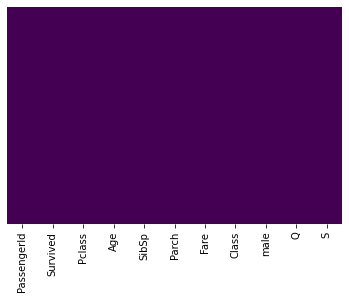

In [59]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [60]:
# the data set looks to be cleaned

In [61]:
# lets start with the prediction

In [62]:
# Train Test Split
# I will split the existing dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived',axis=1), # we exclude the column "Survived"
                                                    data['Survived'], test_size=0.30, #y becomes the size "Survived", which we want to find out
                                                    random_state=101)

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [65]:
predictions = logmodel.predict(X_test)

In [66]:
from sklearn.metrics import classification_report

In [67]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90       281
           1       0.86      0.54      0.67       112

    accuracy                           0.84       393
   macro avg       0.85      0.75      0.78       393
weighted avg       0.85      0.84      0.83       393



In [68]:
# we can see, the results for recall and precision are with high precision and close to 1.

In [69]:
# let us see, how that loocs with confusion matrix
from sklearn.metrics import confusion_matrix

In [70]:
confusion_matrix (y_test, predictions)

array([[271,  10],
       [ 51,  61]], dtype=int64)

In [71]:
# the results seems to be sutisfied to. 